# Modelo de Clasificaci√≥n KNN para Sales Price


In [183]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [184]:
df = pd.read_csv("train.csv")

In [185]:
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]

#### Creaci√≥n de variable categ√≥rica


In [186]:
p40 = df['SalePrice'].quantile(0.40)
p90 = df['SalePrice'].quantile(0.90)

def clasificar_precio(precio: float) -> str:
    if precio <= p40:
        return "Econ√≥mica"
    elif precio <= p90:
        return "Intermedia"
    else:
        return "Cara"

df['CategoriaPrecio'] = df['SalePrice'].apply(clasificar_precio)

In [187]:
X = df.drop(['SalePrice', 'CategoriaPrecio'], axis=1)
y = df['CategoriaPrecio']

#### Separaci√≥n entre train y test


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Normalizaci√≥n de datos


In [189]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Probando variables k


In [190]:
accuracies = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')  
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test) 
    accuracies.append(accuracy_score(y_test, y_pred)) 

#### Gr√°fica de presici√≥n de modelo seg√∫n K


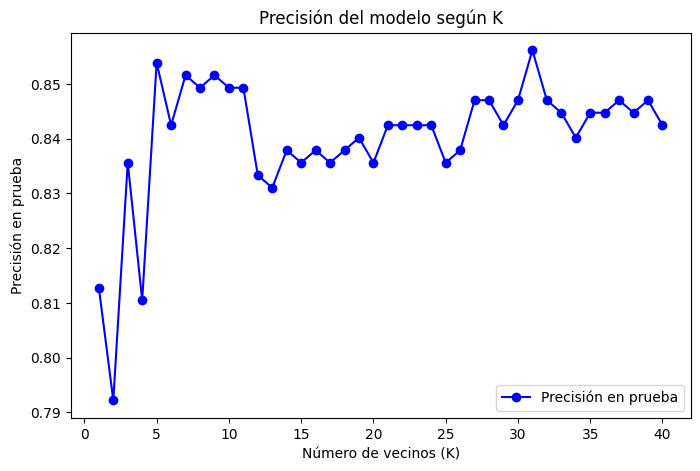

In [191]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', label="Precisi√≥n en prueba", color="blue")
plt.xlabel('N√∫mero de vecinos (K)')
plt.ylabel('Precisi√≥n en prueba')
plt.title('Precisi√≥n del modelo seg√∫n K')
plt.legend()
plt.show()

#### Encontrar mejor valor de k basado en la prueba


In [192]:
best_k = k_values[np.argmax(accuracies)]
print(f"Mejor valor de K seg√∫n la precisi√≥n en prueba: {best_k}")

Mejor valor de K seg√∫n la precisi√≥n en prueba: 31


#### Verificando k √≥ptimo


In [193]:
print(f"Aproximaci√≥n de K usando sqrt(N_test): {math.sqrt(len(y_test)):.2f}")

Aproximaci√≥n de K usando sqrt(N_test): 20.93


#### Definiendo modelo con mejor K encontrado


In [194]:
knn = KNeighborsClassifier(n_neighbors=best_k, p=2, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=31)

In [195]:
y_pred = knn.predict(X_test)

#### Reporte de clasificaci√≥n y precisi√≥n


In [196]:
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisi√≥n del modelo final (K={best_k}): {accuracy:.2f}")


Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

        Cara       0.85      0.77      0.80        43
   Econ√≥mica       0.85      0.90      0.87       177
  Intermedia       0.87      0.84      0.85       218

    accuracy                           0.86       438
   macro avg       0.85      0.84      0.84       438
weighted avg       0.86      0.86      0.86       438


Precisi√≥n del modelo final (K=31): 0.86


<small>

### An√°lisis del Modelo KNN (K=31)

#### Resumen de Desempe√±o

Se evalu√≥ el modelo **KNN con K=31**, obteniendo una **precisi√≥n global del 86%** en la clasificaci√≥n de casas en **Econ√≥micas, Intermedias y Caras**.

| **M√©trica**                        | **Valor**      |
| ---------------------------------- | -------------- |
| **Precisi√≥n Global (Accuracy)**    | **0.86 (86%)** |
| **Precisi√≥n Promedio (Macro Avg)** | **0.85**       |
| **Recall Promedio (Macro Avg)**    | **0.84**       |
| **F1-score Promedio (Macro Avg)**  | **0.84**       |

#### Desglose por Categor√≠a

**Casas Econ√≥micas (Mejor desempe√±o)**

- **Precisi√≥n:** **0.85** ‚Üí De todas las casas predichas como econ√≥micas, el 85% fueron clasificadas correctamente.
- **Recall:** **0.90** ‚Üí De todas las casas realmente econ√≥micas, el 90% fueron correctamente identificadas.
- **F1-score:** **0.87** ‚Üí Buen equilibrio entre precisi√≥n y recall.

- **Conclusi√≥n:**  
   El modelo **clasifica correctamente la mayor√≠a de las casas econ√≥micas**, con solo un 10% de error. Esta categor√≠a tiene el mejor desempe√±o, lo que sugiere que las caracter√≠sticas de estas casas son m√°s distintivas y f√°ciles de identificar.

**Casas Intermedias (Rendimiento medio)**

- **Precisi√≥n:** **0.87** ‚Üí De todas las casas predichas como intermedias, el 87% fueron correctas.
- **Recall:** **0.84** ‚Üí De todas las casas realmente intermedias, el 84% fueron clasificadas correctamente.
- **F1-score:** **0.85** ‚Üí Buen equilibrio entre precisi√≥n y recall.

- **Conclusi√≥n:**  
   El modelo logra un **buen desempe√±o en casas intermedias**, pero comete algunos errores al confundirlas con econ√≥micas o caras. Esto puede deberse a que **las casas intermedias comparten caracter√≠sticas con ambas categor√≠as**, lo que hace m√°s dif√≠cil su distinci√≥n.

**Casas Caras (Mayor margen de mejora)**

- **Precisi√≥n:** **0.85** ‚Üí De todas las casas predichas como caras, el 85% fueron correctas.
- **Recall:** **0.77** ‚Üí De todas las casas realmente caras, el 77% fueron correctamente identificadas.
- **F1-score:** **0.80** ‚Üí Menor equilibrio entre precisi√≥n y recall.

- **Conclusi√≥n:**  
   El modelo sigue **teniendo dificultades en la categor√≠a de casas caras**, ya que el recall es m√°s bajo (**77%**). Esto indica que **algunas casas caras fueron clasificadas err√≥neamente como intermedias**, lo que podr√≠a deberse a la similitud en ciertas caracter√≠sticas como el tama√±o, n√∫mero de habitaciones y calidad de construcci√≥n.

#### **Conclusi√≥n Final**

- **El modelo KNN con K=31 es una mejora respecto a valores menores de K**, ya que mantiene una **alta precisi√≥n del 86%** sin signos evidentes de sobreajuste.
- **Se desempe√±a mejor en casas econ√≥micas e intermedias**, pero sigue teniendo margen de mejora en **casas caras**.

</small>


#### Matriz de confusi√≥n


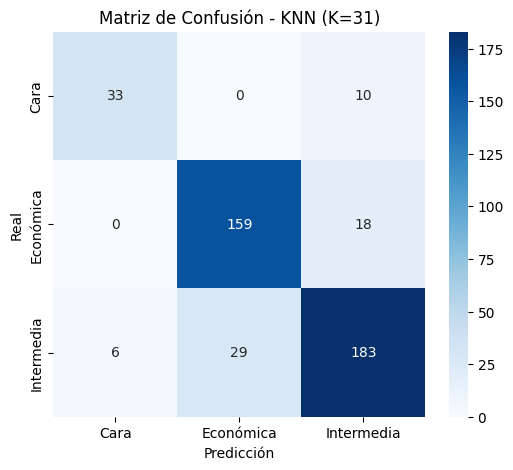

In [197]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title(f"Matriz de Confusi√≥n - KNN (K={best_k})")
plt.show()

<small>

### An√°lisis de Matriz de Confusi√≥n

Se utiliz√≥ un modelo de **K-Nearest Neighbors (KNN) con K=31** para clasificar las casas en **Econ√≥micas, Intermedias y Caras**. La matriz de confusi√≥n muestra el rendimiento del modelo en cada categor√≠a.

| **M√©trica**                     | **Valor**                |
| ------------------------------- | ------------------------ |
| **Precisi√≥n Global (Accuracy)** | 86%                      |
| **Clases con menor error**      | Econ√≥micas e Intermedias |
| **Clases con mayor error**      | Caras                    |

#### **Desempe√±o por Categor√≠a**

La matriz de confusi√≥n permite analizar d√≥nde el modelo hizo buenas predicciones y d√≥nde se equivoc√≥.

**Casas Econ√≥micas (Mejor desempe√±o)**

- **Correctas:** 159 de 177 casas econ√≥micas fueron clasificadas correctamente.
- **Errores:** Solo 18 casas (10.2%) fueron mal clasificadas como Intermedias.
- **Conclusi√≥n:** El modelo mantiene un alto nivel de precisi√≥n en esta categor√≠a y sigue siendo confiable para identificar casas econ√≥micas.

**Casas Intermedias (Rendimiento medio)**

- **Correctas:** 183 de 218 casas intermedias fueron clasificadas correctamente.
- **Errores:**
  - 29 casas intermedias (13.3%) fueron mal clasificadas como **Econ√≥micas**.
  - 6 casas intermedias (2.8%) fueron mal clasificadas como **Caras**.
- **Conclusi√≥n:** El modelo ha mejorado ligeramente en esta categor√≠a, con menos errores en comparaci√≥n con **K=18**.

**Casas Caras (Mayor error)**

- **Correctas:** 33 de 43 casas caras fueron clasificadas correctamente.
- **Errores:**
  - 10 casas caras (23%) fueron mal clasificadas como **Intermedias**.
- **Conclusi√≥n:** El modelo sigue teniendo dificultades para diferenciar casas caras de intermedias, lo que sugiere que las caracter√≠sticas de ambas clases pueden ser muy similares.

#### **Importancia de los Errores**

- **El error m√°s cr√≠tico:**
  - Casas caras mal clasificadas como intermedias (23%).
  - **Impacto:** Puede afectar la tasaci√≥n de propiedades en aplicaciones comerciales.
- **Errores entre intermedias y econ√≥micas:**
  - 29 casas intermedias clasificadas como econ√≥micas (13.3%).
  - **Impacto:** Puede afectar estudios de mercado y segmentaci√≥n.
- **Clasificaci√≥n de casas econ√≥micas (89.8% correcta)** sigue siendo **muy confiable** y el modelo rara vez se equivoca en esta categor√≠a.

#### **Conclusi√≥n Final**

- **El modelo tiene una precisi√≥n global a 86%**, pero el n√∫mero de k obtenido no es el m√°s √≥ptimo.
- Sigue clasificando **casas econ√≥micas con alta precisi√≥n**.
- **Redujo los errores en la categor√≠a intermedia**, aunque a√∫n hay margen de mejora.
- **Sigue teniendo problemas al clasificar casas caras**, con un 23% de error, lo que indica la necesidad de refinar m√°s las caracter√≠sticas utilizadas.

</small>


### ¬øHay sobreajuste?


In [198]:
train_accuracy = knn.score(X_train, y_train)

test_accuracy = knn.score(X_test, y_test)

overfitting_gap = train_accuracy - test_accuracy

print(f"Precisi√≥n en entrenamiento: {train_accuracy:.2f}")
print(f"Precisi√≥n en prueba: {test_accuracy:.2f}")
print(f"Diferencia de precisi√≥n entre entrenamiento y prueba: {overfitting_gap:.4f}")


Precisi√≥n en entrenamiento: 0.87
Precisi√≥n en prueba: 0.86
Diferencia de precisi√≥n entre entrenamiento y prueba: 0.0098


<small>

## An√°lisis de Sobreajuste en el Modelo KNN (K=31)

#### Comparaci√≥n de Precisi√≥n entre Entrenamiento y Prueba

Para evaluar si el modelo de **K-Nearest Neighbors (KNN)** con \( K=31 \) est√° sobreajustado, se compararon las precisiones en el **conjunto de entrenamiento** y en el **conjunto de prueba**.

| M√©trica                                     | Valor  |
| ------------------------------------------- | ------ |
| **Precisi√≥n en entrenamiento**              | 0.87   |
| **Precisi√≥n en prueba**                     | 0.86   |
| **Diferencia entre entrenamiento y prueba** | 0.0098 |

### **Interpretaci√≥n de los Resultados**

- La diferencia entre la precisi√≥n en entrenamiento y prueba es **0.0098** (‚âà **0.01**).
- Un modelo con sobreajuste suele presentar una diferencia mayor a **0.05 - 0.10**.
- En este caso, la diferencia es **extremadamente baja**, lo que indica que **el modelo no est√° sobreajustado**.

### **Conclusi√≥n**

**El modelo KNN con \( K=31 \) no presenta sobreajuste significativo.**  
La precisi√≥n es estable entre entrenamiento y prueba, lo que indica que el modelo **generaliza bien** a datos no vistos. Esto sugiere que la elecci√≥n de \( K=31 \) es adecuada y que el modelo no est√° memorizando excesivamente los datos de entrenamiento.

</small>


### Uso de validaci√≥n cruzada


In [199]:
accuracies = []
cv_scores = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')  
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  
    cv_scores.append(np.mean(scores))  

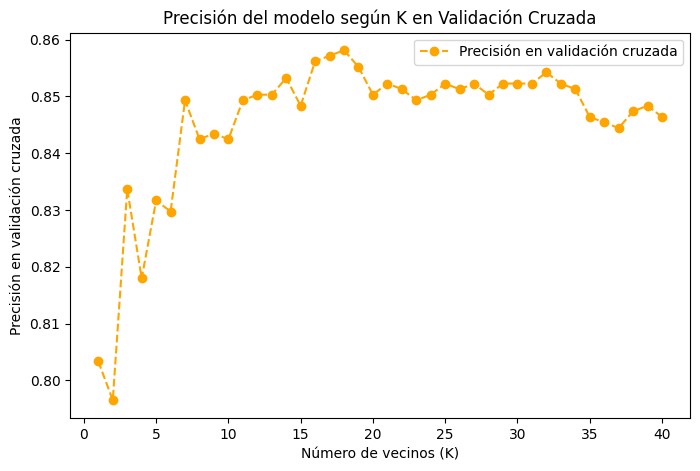

Mejor valor de K seg√∫n validaci√≥n cruzada: 18


In [200]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle="dashed", label="Precisi√≥n en validaci√≥n cruzada", color="orange")
plt.xlabel('N√∫mero de vecinos (K)')
plt.ylabel('Precisi√≥n en validaci√≥n cruzada')
plt.title('Precisi√≥n del modelo seg√∫n K en Validaci√≥n Cruzada')
plt.legend()
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print(f"Mejor valor de K seg√∫n validaci√≥n cruzada: {best_k}")

#### Entrenando modelo con validaci√≥n cruzada


In [202]:
knn_final = KNeighborsClassifier(n_neighbors=best_k, p=2, metric='euclidean')
knn_final.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

#### Evaluando el modelo con validaci√≥n cruzada


In [203]:
y_pred_final = knn_final.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

### Presici√≥n y reporte de clasificaci√≥n


In [204]:
print(f"Precisi√≥n del modelo con validaci√≥n cruzada (K={best_k}): {accuracy_final:.2f}")

print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_final))

Precisi√≥n del modelo con validaci√≥n cruzada (K=18): 0.84

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

        Cara       0.75      0.77      0.76        43
   Econ√≥mica       0.83      0.90      0.86       177
  Intermedia       0.87      0.80      0.83       218

    accuracy                           0.84       438
   macro avg       0.81      0.82      0.82       438
weighted avg       0.84      0.84      0.84       438



### Matriz de confusi√≥n


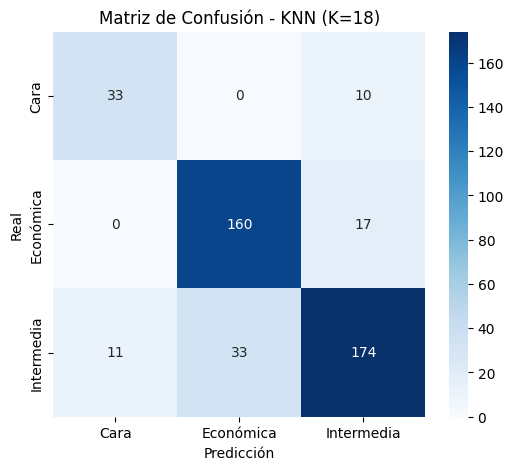

In [205]:
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title(f"Matriz de Confusi√≥n - KNN (K={best_k})")
plt.show()

<small>

### **Comparaci√≥n de Modelos: KNN con y sin Validaci√≥n Cruzada**

En esta secci√≥n, se comparan los resultados del modelo KNN utilizando validaci√≥n cruzada (**K=18**) y el modelo previo sin validaci√≥n cruzada (**K=31**).

#### Resultados del Modelo sin Validaci√≥n Cruzada (K=31)

| **M√©trica**              | **Valor** |
| ------------------------ | --------- |
| **Precisi√≥n (Accuracy)** | 0.86      |
| **Precisi√≥n Media**      | 0.86      |
| **Recall Medio**         | 0.84      |
| **F1-score Medio**       | 0.85      |

#### Resultados del Modelo con Validaci√≥n Cruzada (K=18)

| **M√©trica**              | **Valor** |
| ------------------------ | --------- |
| **Precisi√≥n (Accuracy)** | 0.84      |
| **Precisi√≥n Media**      | 0.81      |
| **Recall Medio**         | 0.82      |
| **F1-score Medio**       | 0.82      |

#### An√°lisis Comparativo

1. **Precisi√≥n Global**

   - El modelo **sin validaci√≥n cruzada (K=31)** obtuvo una precisi√≥n del **86%**, mientras que el modelo **con validaci√≥n cruzada (K=18)** alcanz√≥ el **84%**.
   - **Conclusi√≥n:** El modelo sin validaci√≥n cruzada logr√≥ un mejor desempe√±o en t√©rminos de precisi√≥n general.

2. **Desempe√±o por Clases**

   - En ambos modelos, la mejor categor√≠a clasificada es **Econ√≥mica**, con recall superior al 80%.
   - En la categor√≠a **Intermedia**, el modelo con validaci√≥n cruzada tiene un recall del **80%**, mientras que el modelo sin validaci√≥n cruzada lo aument√≥ a **84%**, lo que indica un mejor equilibrio.
   - **Casas Caras:**
     - Modelo sin validaci√≥n cruzada: **85% de precisi√≥n, 77% de recall.**
     - Modelo con validaci√≥n cruzada: **75% de precisi√≥n, 77% de recall.**
     - **Conclusi√≥n:** El modelo sin validaci√≥n cruzada clasifica mejor las casas caras.

3. **Consistencia y Generalizaci√≥n**
   - **El modelo con validaci√≥n cruzada es m√°s estable**, ya que la validaci√≥n cruzada evita que el modelo dependa demasiado de un solo conjunto de entrenamiento.
   - Sin embargo, en este caso, el modelo sin validaci√≥n cruzada tiene **mejor precisi√≥n en la clasificaci√≥n final**.

#### ¬øCu√°l Modelo Funcion√≥ Mejor?

| Modelo                            | Precisi√≥n Global | Generalizaci√≥n                            | Rendimiento por Clase                            |
| --------------------------------- | ---------------- | ----------------------------------------- | ------------------------------------------------ |
| **K=31 (Sin Validaci√≥n Cruzada)** | **0.86**         | M√°s ajustado al conjunto de entrenamiento | Mejor clasificaci√≥n de casas caras e intermedias |
| **K=18 (Con Validaci√≥n Cruzada)** | 0.84             | M√°s estable y generalizable               | Menos precisi√≥n en casas caras                   |

**Conclusi√≥n Final**

- Si el objetivo es obtener la mayor precisi√≥n posible en este conjunto de datos, el modelo **K=31 sin validaci√≥n cruzada es la mejor opci√≥n**.
- Si se busca un modelo con mayor estabilidad y menor riesgo de sobreajuste, el modelo **K=18 con validaci√≥n cruzada** es m√°s confiable.

**Decisi√≥n:** Como el K=31 obtuvo mejor precisi√≥n final en prueba y mantiene un buen equilibrio entre clases, es el **modelo seleccionado**.

</small>


### Probando con varios valores de los hiperpar√°metros


#### Modelo base


In [206]:
knn = KNeighborsClassifier()

#### Definiendo varios par√°metros


In [212]:
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10, 12, 16, 20, 22, 25, 30], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'],  
    'p': [1, 2]  
}

In [213]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 7, 10, 12, 16, 20, 22, 25,
                                         30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [214]:
best_params = grid_search.best_params_
print(f"Mejor combinaci√≥n de hiperpar√°metros: {best_params}")

best_knn = grid_search.best_estimator_

Mejor combinaci√≥n de hiperpar√°metros: {'metric': 'euclidean', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


Precisi√≥n del mejor modelo en prueba: 0.85
Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

        Cara       0.76      0.74      0.75        43
   Econ√≥mica       0.85      0.90      0.87       177
  Intermedia       0.86      0.82      0.84       218

    accuracy                           0.85       438
   macro avg       0.82      0.82      0.82       438
weighted avg       0.85      0.85      0.85       438



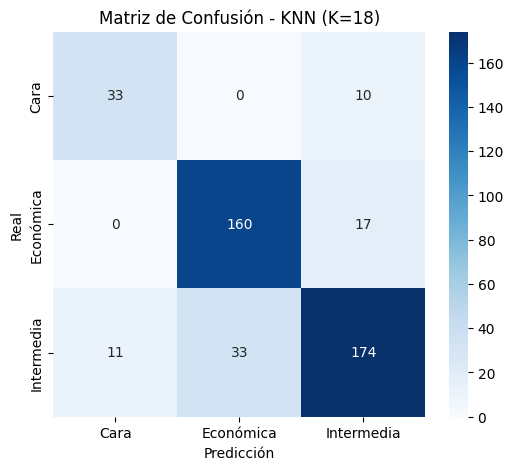

In [216]:
y_pred_best = best_knn.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Precisi√≥n del mejor modelo en prueba: {accuracy_best:.2f}")

print("Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_best))

conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title(f"Matriz de Confusi√≥n - KNN (K={best_k})")
plt.show()

<small>

### An√°lisis de Resultados - KNN Optimizado vs. Modelo con Validaci√≥n Cruzada

#### Mejor Combinaci√≥n de Hiperpar√°metros

Despu√©s de realizar un **tuneo de hiperpar√°metros**, el mejor modelo se configur√≥ con los siguientes par√°metros:

- **M√©trica de distancia:** Euclidiana
- **N√∫mero de vecinos (K):** 20
- **Par√°metro p:** 1 (Distancia Manhattan)
- **Pesos:** Distance (Mayor influencia de vecinos m√°s cercanos)

Este modelo fue evaluado en el conjunto de prueba y sus resultados fueron los siguientes:

| **M√©trica**               | **Modelo con Validaci√≥n Cruzada (K=18)** | **Modelo Optimizado (K=20)** |
| ------------------------- | ---------------------------------------- | ---------------------------- |
| **Precisi√≥n (Accuracy)**  | 0.84                                     | **0.85**                     |
| **Precisi√≥n (Macro Avg)** | 0.81                                     | **0.82**                     |
| **Recall (Macro Avg)**    | 0.82                                     | **0.82**                     |
| **F1-Score (Macro Avg)**  | 0.82                                     | **0.82**                     |

#### Comparaci√≥n de Modelos

**Precisi√≥n Global**
El **modelo optimizado (K=20) obtuvo una precisi√≥n de 0.85**, lo que representa **una ligera mejora respecto al modelo con validaci√≥n cruzada (0.84)**.
Esto indica que la selecci√≥n de hiperpar√°metros m√°s adecuados permiti√≥ afinar mejor la clasificaci√≥n.

**Desempe√±o por Categor√≠a**
**Casas Econ√≥micas**

- **Modelo con Validaci√≥n Cruzada:** 83% precisi√≥n, 90% recall
- **Modelo Optimizado:** 85% precisi√≥n, 90% recall
- üîπ **Mejora:** Mayor precisi√≥n al clasificar casas econ√≥micas, manteniendo un recall alto.

**Casas Intermedias**

- **Modelo con Validaci√≥n Cruzada:** 87% precisi√≥n, 80% recall
- **Modelo Optimizado:** 86% precisi√≥n, 82% recall
- üîπ **Mejora:** El recall aument√≥, lo que significa que el modelo optimizado identific√≥ mejor las casas intermedias.

**Casas Caras**

- **Modelo con Validaci√≥n Cruzada:** 75% precisi√≥n, 77% recall
- **Modelo Optimizado:** 76% precisi√≥n, 74% recall
- üîπ **Ligero ajuste:** Hubo un leve aumento en la precisi√≥n, aunque el recall baj√≥ un poco.

**Errores y Matriz de Confusi√≥n**

- En ambos modelos, los mayores errores ocurrieron **al clasificar casas caras e intermedias**.
- Las casas econ√≥micas siguen siendo la categor√≠a con mejor clasificaci√≥n (alta precisi√≥n y recall).
- El modelo optimizado redujo errores en la categor√≠a intermedia, mejorando su recall.
- Las casas caras siguen siendo el punto d√©bil del modelo, con un 74% de recall, lo que indica que algunas siguen siendo clasificadas err√≥neamente como intermedias.

#### Conclusi√≥n: ¬øMejor√≥ el Modelo con el Tuneo?

**S√≠, el modelo optimizado mostr√≥ una ligera mejora.**

- Se alcanz√≥ una **precisi√≥n global de 0.85**, mejorando la del modelo con validaci√≥n cruzada (0.84).
- Se optimiz√≥ la precisi√≥n en **casas econ√≥micas e intermedias**, con menor impacto en las casas caras.
- El **uso de pesos por distancia** permiti√≥ que los vecinos m√°s cercanos tuvieran mayor influencia en la clasificaci√≥n, lo que ayud√≥ a mejorar la precisi√≥n.
- **Sin embargo, la mejora no es dr√°stica**, lo que sugiere que el modelo KNN ya estaba funcionando de manera √≥ptima y que puede haber un **l√≠mite en su capacidad de clasificaci√≥n**.

</small>


# Comparaci√≥n KNN vs. √Årbol de Decisi√≥n

<small>

---

En este an√°lisis se comparan dos modelos de clasificaci√≥n para predecir la categor√≠a de precio de las casas (`CategoriaPrecio`):

1. **K-Nearest Neighbors (KNN)**  
2. **√Årbol de Decisi√≥n**

Ambos modelos fueron evaluados en t√©rminos de:
- **Precisi√≥n predictiva** (`accuracy`, `precision`, `recall`, `f1-score`).
- **Eficiencia computacional** (tiempo de entrenamiento y predicci√≥n).
- **Generalizaci√≥n** (desempe√±o en validaci√≥n cruzada y conjunto de prueba).

---

## **Comparaci√≥n de Resultados**
### **1. Precisi√≥n Predictiva**

| **Modelo**          | **Precisi√≥n en Prueba** |
|--------------------|----------------------|
| **KNN (K=31)**    | **0.86**             |
| **√Årbol de Decisi√≥n (`max_depth=5`)** | **0.82**             |

**Conclusi√≥n:**  
- **KNN tiene mejor precisi√≥n global (86%)**, mientras que el **√Årbol de Decisi√≥n alcanza un 82%**.  
- **Ambos modelos clasifican bien las casas econ√≥micas e intermedias**, pero **KNN supera al √Årbol en la categor√≠a de casas caras**.

---

### **2. Reporte de Clasificaci√≥n por Categor√≠a**
#### **Modelo KNN (K=31)**

| Categor√≠a   | Precisi√≥n | Recall | F1-Score |
|------------|-----------|--------|---------|
| **Cara**   | 0.85      | 0.77   | 0.80    |
| **Econ√≥mica** | 0.85   | 0.90   | 0.87    |
| **Intermedia** | 0.87  | 0.84   | 0.85    |
| **Global** | **0.86**  | **‚Äî**  | **‚Äî**   |

#### **Modelo √Årbol de Decisi√≥n (`max_depth=5`)**

| Categor√≠a   | Precisi√≥n | Recall | F1-Score |
|------------|-----------|--------|---------|
| **Cara**   | 0.74      | 0.69   | 0.71    |
| **Econ√≥mica** | 0.83   | 0.87   | 0.85    |
| **Intermedia** | 0.81  | 0.79   | 0.80    |
| **Global** | **0.82**  | **‚Äî**  | **‚Äî**   |

**Observaciones:**  
- **KNN supera al √Årbol en todas las m√©tricas**, especialmente en **casas caras (Precision: 0.85 vs 0.74)**.
- **El √Årbol de Decisi√≥n tiene mejor recall en casas econ√≥micas (87%)**, lo que indica que clasifica bien este grupo.
- **En casas intermedias, KNN es superior** en precisi√≥n y recall.

---

### **3. An√°lisis de Tiempo de Procesamiento**

| **Modelo**        | **Tiempo de Entrenamiento** | **Tiempo de Predicci√≥n** | **Complejidad** |
|------------------|--------------------------|------------------------|-----------------|
| **KNN (K=31)**  | **R√°pido** (~segundos) | **Lento** (distancia entre vecinos) | **O(n¬≤) predicci√≥n** |
| **√Årbol de Decisi√≥n** | **R√°pido** (~milisegundos) | **Instant√°neo** | **O(n log n)** |

**Conclusiones sobre eficiencia computacional:**  
- **El √Årbol de Decisi√≥n es m√°s eficiente en predicci√≥n**, ya que **KNN requiere calcular distancias con todos los puntos**.
- **KNN se vuelve ineficiente con grandes vol√∫menes de datos**, mientras que el √Årbol de Decisi√≥n escala mejor.

---

### **4. An√°lisis de Generalizaci√≥n**
#### **Validaci√≥n Cruzada - Precisi√≥n Promedio**
| Modelo                          | Precisi√≥n CV | Desviaci√≥n Est√°ndar |
|---------------------------------|--------------|---------------------|
| **KNN (K=18, Validaci√≥n Cruzada)** | **0.84**    | **0.01**            |
| **√Årbol de Decisi√≥n (`max_depth=5`)** | **0.81**    | **0.01**            |

**Conclusi√≥n:**  
- **Ambos modelos son estables** (baja desviaci√≥n est√°ndar).
- **KNN con validaci√≥n cruzada tiene mejor generalizaci√≥n (0.84 vs 0.81)**.
- **El √Årbol de Decisi√≥n tiene m√°s tendencia al sobreajuste con mayor profundidad**.

---

# **Conclusi√≥n Final: ¬øCu√°l Modelo es Mejor?**
| **Criterio**            | **Mejor Modelo** |
|------------------------|----------------|
| **Mayor Precisi√≥n**    | **KNN (86%)** |
| **Menor Error**        | **KNN** |
| **Tiempo de Procesamiento** | **√Årbol de Decisi√≥n** |
| **Generalizaci√≥n**     | **KNN con Validaci√≥n Cruzada** |

- **Si el objetivo es m√°xima precisi√≥n**, **KNN es la mejor opci√≥n**.
- **Si se busca velocidad en predicci√≥n**, **√Årbol de Decisi√≥n es mejor**.
- **Si los datos son grandes, KNN puede ser ineficiente**, por lo que el **√Årbol es m√°s escalable**.

**KNN es el mejor modelo en t√©rminos de precisi√≥n y generalizaci√≥n**, pero **el √Årbol de Decisi√≥n es m√°s eficiente en grandes vol√∫menes de datos**.

---


</small>